# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [2]:
raw = pd.read_csv('E:\Rakamin\JAP\Mini Project\Investigate Hotel Business using Data Visualization\[TASK 1] Data Preparation\hotel_bookings_data.csv', on_bad_lines='skip')
raw.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,3,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,4,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,0,No Deposit,NaN,NaN,0,Personal,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,0,No Deposit,304.0,NaN,0,Personal,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0,No Deposit,240.0,NaN,0,Personal,98.0,0,1,Check-Out


# Menganalisis Data

In [3]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Pengamatan\:
1. Jumlah baris yang dimiliki adalah 119390 baris
2. Terdapat data Null pada kolom : `children`, `city`, `agent`, dan `company`
3. Terdapat beberapa tipe data yang tidak sesuai yaitu :
 - `children` dari float diubah menjadi int
 - `agent` dan `company` diubah dari float ke int

# TASK 1

# Data Preprocessing

### Mengisi atau menghapus data NULL

In [4]:
# Mengopy data yang akan diedit
df = raw.copy()

In [5]:
# Memeriksa jumlah nilai Null pada kolom
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_weekdays_nights               0
adults                                 0
children                               4
babies                                 0
meal                                   0
city                                 488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type   

In [6]:
# Mengisi City dengan nilai modus
df['city'].fillna(df['city'].mode()[0],inplace=True)
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_weekdays_nights               0
adults                                 0
children                               4
babies                                 0
meal                                   0
city                                   0
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type   

In [7]:
# Mengisi nilai 0 pada kolom children, Agent , dan company
df['children'] = df['children'].fillna(0)
df['agent'] = df['agent'].fillna(0)
df['company'] = df['company'].fillna(0)
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_weekdays_nights          0
adults                            0
children                          0
babies                            0
meal                              0
city                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

Dari hasil diatas dapat dilihat bahwa sudah tidak terdapat nilai NUll pada data

### Mengubah/ menyesuaikan tipe data 

In [8]:
# Mengubah children, agent, dan company dari float ke int
df['children'] = df['children'].astype(np.int64)
df['agent'] = df['agent'].astype(np.int64)
df['company'] = df['company'].astype(np.int64)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  int64  
 11  babies                          119390 non-null  int64  
 12  meal            

# Memeriksa data yang akan dihapus

## Data duplikat

In [9]:
# Memeriksa apakah terdapat data yang duplikat karena hasil true maka terdapat data yang duplikat
df.duplicated().any()

True

In [10]:
# jumlah data yang duplikat
df.duplicated().sum()

33282

In [11]:
# Memeriksa baris dengan data duplikat
df[df.duplicated(keep=False) == True]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0,No Deposit,240,0,0,Personal,98.00,0,1,Check-Out
5,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0,No Deposit,240,0,0,Personal,98.00,0,1,Check-Out
21,Resort Hotel,0,72,2017,September,27,1,2,4,2,...,1,No Deposit,250,0,0,Personal,84.67,0,1,Check-Out
22,Resort Hotel,0,72,2017,September,27,1,2,4,2,...,1,No Deposit,250,0,0,Personal,84.67,0,1,Check-Out
39,Resort Hotel,0,70,2017,September,27,2,2,3,2,...,0,No Deposit,250,0,0,Personal,137.00,0,1,Check-Out
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119352,City Hotel,0,63,2019,October,35,31,0,3,3,...,0,No Deposit,9,0,0,Family,195.33,0,2,Check-Out
119353,City Hotel,0,63,2019,October,35,31,0,3,3,...,0,No Deposit,9,0,0,Family,195.33,0,2,Check-Out
119354,City Hotel,0,63,2019,October,35,31,0,3,3,...,0,No Deposit,9,0,0,Family,195.33,0,2,Check-Out
119372,City Hotel,0,175,2019,October,35,31,1,3,1,...,0,No Deposit,42,0,0,Personal,82.35,0,1,Check-Out


In [12]:
# Menghapus data duplikat, hasil dari pemrosesan adalah False yang berarti sudah tidak ada data duplikat
df_pre = df.drop_duplicates()
df_pre.duplicated().any()

False

In [13]:
# jumlah data yang duplikat
df_pre.duplicated().sum()

0

In [14]:
# Menyimpan data setelah preprocessing ke file csv
# df_pre.to_csv('clean_hotel_dataset.csv', index=False)

# TASK 2

In [15]:
df_fin = df_pre.copy()

In [16]:
# dikelompokan berdasarkan bulan dan tahun
df_cus = df_fin[(df_fin['is_canceled'] == 0)]
df_cob = df_cus.groupby(['hotel', 'arrival_date_month', 'arrival_date_year']).agg({'is_canceled' : 'count'})
df_cob

is_canceled
hotel        arrival_date_month arrival_date_year             
City Hotel   April              2018                      1264
                                2019                      1336
             August             2018                      1616
                                2019                      1805
             December           2017                      1176
                                2018                      1782
             February           2017                       786
                                2018                      1227
             January            2017                       629
                                2018                      1528
             July               2018                      1670
                                2019                      1951
             June               2018                      1648
                                2019                      1654
             March              2018                       802
                                2019                      1140
             May                2018                      1713
                                2019                      1754
             November           2017                      1249
                                2018                      1778
             October            2017                       836
                                2018                      1888
                                2019                      1684
             September          2017                       152
                                2018                      1792
                                2019                      1861
Resort Hotel April              2018                       981
                                2019                      1055
             August             2018                       923
                                2019                       982
             December           2017                       962
                                2018                      1188
             February           2017                       802
                                2018                       903
             January            2017                       745
                                2018                       983
             July               2018                      1113
                                2019                      1100
             June               2018                      1072
                                2019                      1055
             March              2018                       729
                                2019                       936
             May                2018                      1204
                                2019                       948
             November           2017                       887
                                2018                       940
             October            2017                      1002
                                2018                      1069
                                2019                      1070
             September          2017                       995
                                2018                       949
                                2019                      1059

In [17]:
df_month = df_cob.reset_index()

df_month.columns = ['hotel','month','year','total_cus']

month_sorted = df_month.sort_values(by =['month','year'], ascending=[True,True])
month_sorted

,hotel,month,year,total_cus
0,City Hotel,April,2018,1264
26,Resort Hotel,April,2018,981
1,City Hotel,April,2019,1336
27,Resort Hotel,April,2019,1055
2,City Hotel,August,2018,1616
28,Resort Hotel,August,2018,923
3,City Hotel,August,2019,1805
29,Resort Hotel,August,2019,982
4,City Hotel,December,2017,1176
30,Resort Hotel,December,2017,962


In [18]:
df_month_sum = df_month.groupby(['hotel', 'month']).agg({'total_cus' : 'sum'}).reset_index()
df_month_sum.rename(columns={'total_cus':'sum_cus'},inplace =True)
df_month = df_month.merge(df_month_sum, on = ['hotel', 'month'])
df_month.sample(10)

,hotel,month,year,total_cus,sum_cus
20,City Hotel,October,2017,836,4408
28,Resort Hotel,August,2018,923,1905
38,Resort Hotel,June,2018,1072,2127
25,City Hotel,September,2019,1861,3805
10,City Hotel,July,2018,1670,3621
49,Resort Hotel,September,2017,995,3003
48,Resort Hotel,October,2019,1070,3141
26,Resort Hotel,April,2018,981,2036
37,Resort Hotel,July,2019,1100,2213
16,City Hotel,May,2018,1713,3467


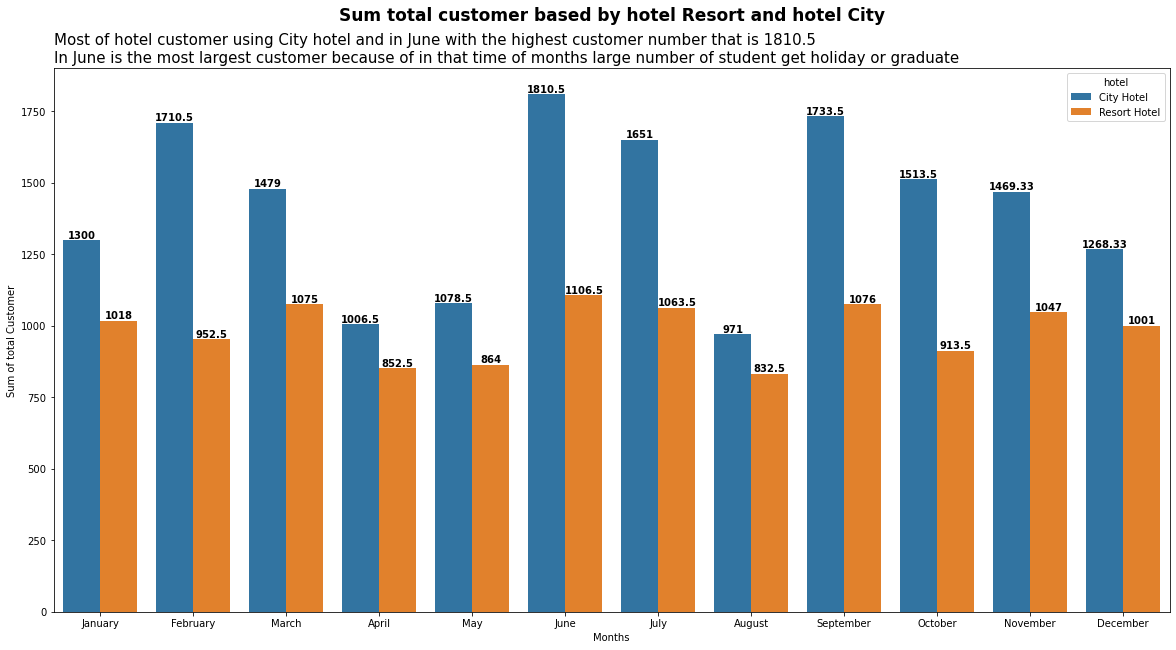

In [34]:
fig,ax= plt.subplots(figsize=(20,10))
sns.barplot(x='month', y='total_cus', data=df_month, hue='hotel',ci = 0);

for label in ax.containers:
    ax.bar_label(label,fontweight='bold')
    
plt.title('Sum total customer based by hotel Resort and hotel City\n\n', fontsize=17, fontweight='bold')
plt.title('Most of hotel customer using City hotel and in June with the highest customer number that is 1810.5\n' 
          'In June is the most largest customer because of in that time of months large number of student get holiday or graduate', 
          fontsize =15, loc='left')

plt.xlabel('Months')
plt.xticks(np.arange(12), ['January','February','March','April','May','June','July','August','September','October','November','December'])

plt.ylabel('Sum of total Customer')
plt.show()

### Insight

Pada saat memasuki bulan Juni dapat diberikan suatu kupon pelajar untuk meningkatkan customer hotel, dan juga dapat diberikan voucher pada waktu akhir tahun karena pada saat itu terdapat libur tahun baru atau natal

# TASK 3

In [122]:
df_t3 = df_fin.copy()

In [123]:
# Memilih kolom yang akan digunakan 
use = ['hotel','is_canceled', 'arrival_date_month', 'arrival_date_year','stays_in_weekend_nights','stays_in_weekdays_nights']
df_use = df_t3[use]

In [124]:
df_cor = df_use.copy()
df_cor

,hotel,is_canceled,arrival_date_month,arrival_date_year,stays_in_weekend_nights,stays_in_weekdays_nights
0,Resort Hotel,0,September,2017,0,0
1,Resort Hotel,0,September,2017,0,0
2,Resort Hotel,0,September,2017,0,1
3,Resort Hotel,0,September,2017,0,1
4,Resort Hotel,0,September,2017,0,2
...,...,...,...,...,...,...
119385,City Hotel,0,October,2019,2,5
119386,City Hotel,0,October,2019,2,5
119387,City Hotel,0,October,2019,2,5
119388,City Hotel,0,October,2019,2,5


In [125]:
# Cari nilai durasi dan drop kolom setelah perhitungan
df_cor['duration'] = df_cor['stays_in_weekend_nights'] + df_cor['stays_in_weekdays_nights']
df_cor = df_cor.drop(['stays_in_weekend_nights','stays_in_weekdays_nights'], axis=1)
df_corf =  df_cor[(df_cor['is_canceled'] == 1)]
df_corf

,hotel,is_canceled,arrival_date_month,arrival_date_year,duration
8,Resort Hotel,1,September,2017,3
9,Resort Hotel,1,September,2017,3
10,Resort Hotel,1,September,2017,4
27,Resort Hotel,1,September,2017,7
32,Resort Hotel,1,September,2017,10
...,...,...,...,...,...
110280,City Hotel,1,June,2019,0
111355,City Hotel,1,August,2019,1
111924,City Hotel,1,July,2019,1
111925,City Hotel,1,September,2019,1


In [126]:
df_corf.describe()

,is_canceled,arrival_date_year,duration
count,23735.0,23735.000000,23735.000000
mean,1.0,2018.311060,4.014746
std,0.0,0.661018,2.905602
min,1.0,2017.000000,0.000000
25%,1.0,2018.000000,2.000000
50%,1.0,2018.000000,3.000000
75%,1.0,2019.000000,5.000000
max,1.0,2019.000000,56.000000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


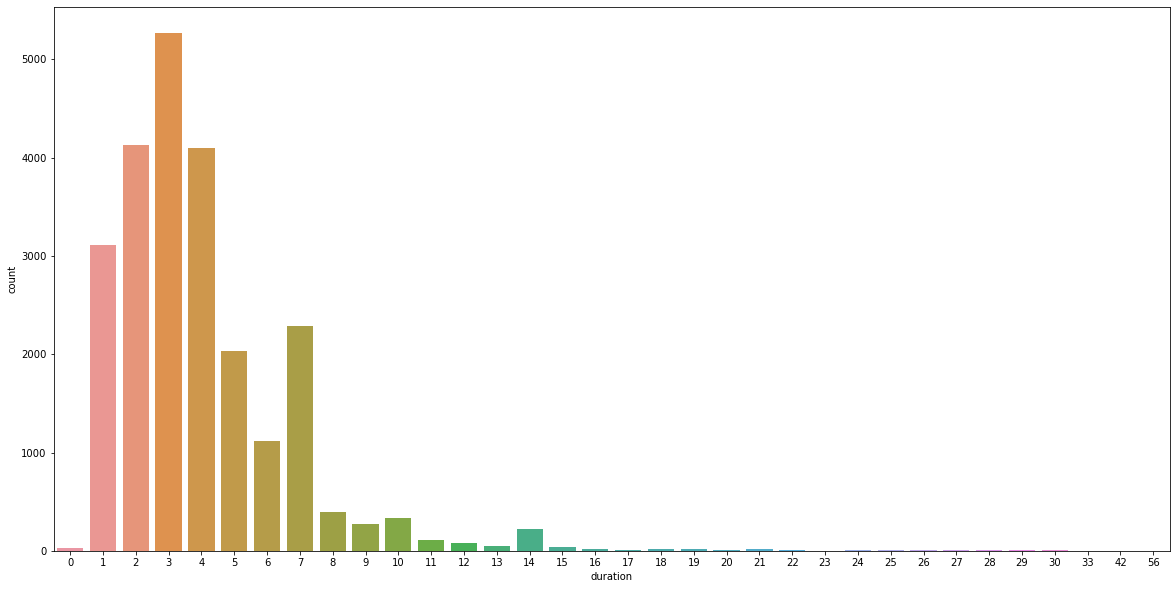

In [127]:
plt.figure(figsize = (20,10))
sns.countplot(df_corf['duration'])
plt.show()

C:\Users\MOHAMA~1\AppData\Local\Temp/ipykernel_20984/2002045735.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corf['duration_category']=np.where(df_corf['duration']<3,'Short',


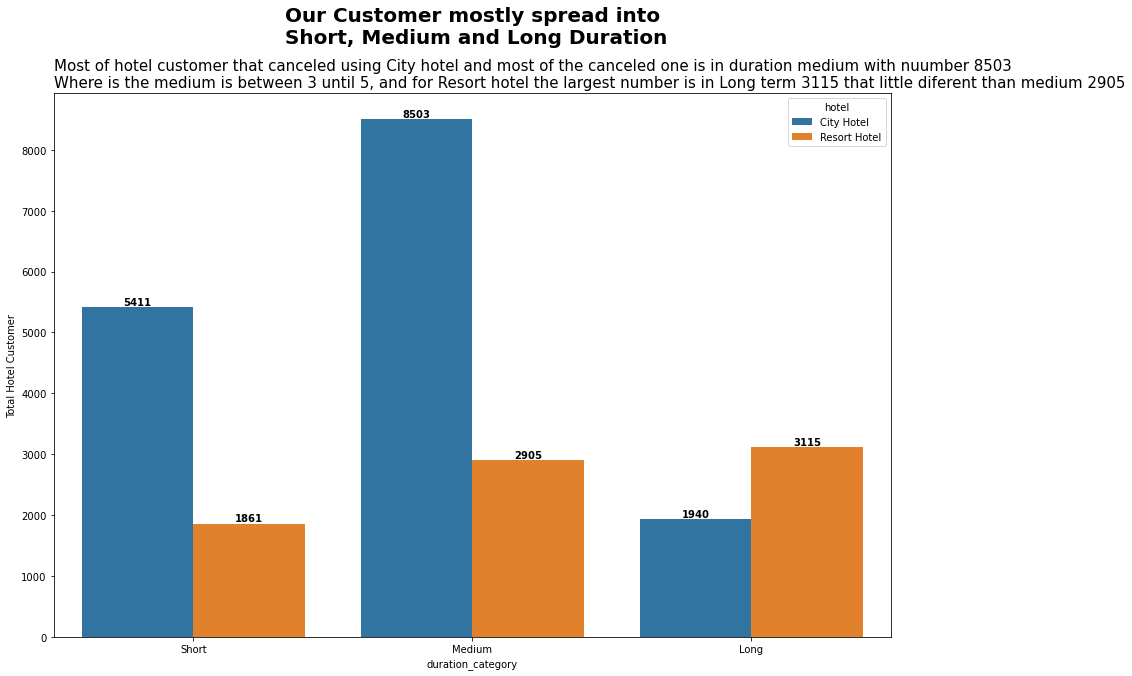

In [132]:
# dikategorikan sesuai dengan durasi (short, medium, Long)
df_corf['duration_category']=np.where(df_corf['duration']<3,'Short', 
                           np.where((df_corf['duration']>=3)&(df_corf['duration']<=5),'Medium','Long'))

dfg2 = df_corf.groupby(['hotel','duration_category']).agg({'is_canceled' : 'sum'}).reset_index()
list_order = ['Short','Medium','Long']
dfg2['duration_category'] = pd.Categorical(dfg2['duration_category'], categories = list_order)
dfg2f = dfg2.sort_values(by = 'duration_category')


fig,ax = plt.subplots(figsize=(15,10))
plt.title('Our Customer mostly spread into\n Short, Medium and Long Duration\n\n', fontsize=20, weight='bold')
plt.title('Most of hotel customer that canceled using City hotel and most of the canceled one is in duration medium with nuumber 8503\n' 
          'Where is the medium is between 3 until 5, and for Resort hotel the largest number is in Long term 3115 that little diferent than medium 2905', 
          fontsize =15, loc='left')


sns.barplot(x = 'duration_category', y= 'is_canceled', data=dfg2f, hue='hotel');
plt.ylabel('Total Hotel Customer')

for label in ax.containers:
    ax.bar_label(label,fontweight='bold')

plt.show()

### insight

Bisa diberikan pelayanan khusus jika reservasi lebih dari waktu tertentu, agar customer dapat lebih nyaman dengan pelayanan hotel dan membuat customer lebih senang untuk melakukan reservasi dan menurunkan nilai dari pembatalan reservasi

# TASK 4

In [136]:
df_t4 = df_fin.copy()

In [137]:
# Memilih kolom yang akan digunakan 
use2 = ['hotel','is_canceled','lead_time','arrival_date_month', 'arrival_date_year']
df_use2 = df_t4[use2]

In [138]:
df_cor2 = df_use2.copy()
df_corf2 =  df_cor2[(df_cor2['is_canceled'] == 1)]
df_corf2

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_year
8,Resort Hotel,1,85,September,2017
9,Resort Hotel,1,75,September,2017
10,Resort Hotel,1,23,September,2017
27,Resort Hotel,1,60,September,2017
32,Resort Hotel,1,96,September,2017
...,...,...,...,...,...
110280,City Hotel,1,132,June,2019
111355,City Hotel,1,4,August,2019
111924,City Hotel,1,7,July,2019
111925,City Hotel,1,6,September,2019


In [139]:
df_corf2.describe()

,is_canceled,lead_time,arrival_date_year
count,23735.0,23735.000000,23735.000000
mean,1.0,105.432231,2018.311060
std,0.0,91.731377,0.661018
min,1.0,0.000000,2017.000000
25%,1.0,32.000000,2018.000000
50%,1.0,79.000000,2018.000000
75%,1.0,158.000000,2019.000000
max,1.0,629.000000,2019.000000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


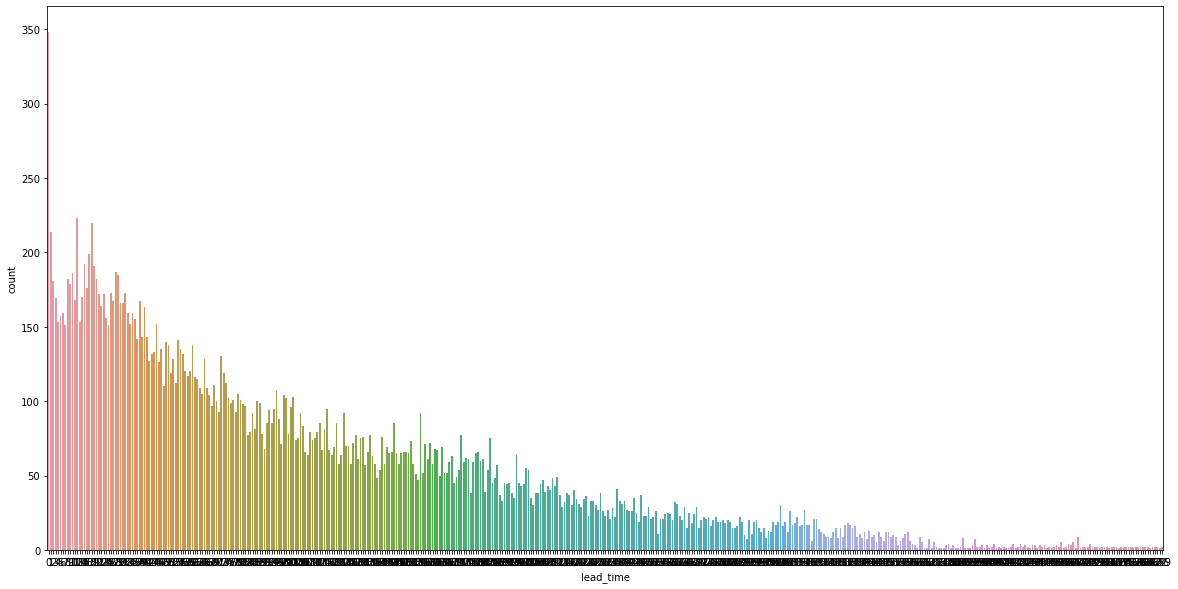

In [141]:
plt.figure(figsize = (20,10))
sns.countplot(df_corf2['lead_time'])
plt.show()

C:\Users\MOHAMA~1\AppData\Local\Temp/ipykernel_20984/2658122041.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corf2['lead_category']=np.where(df_corf2['lead_time']<30,'Short',


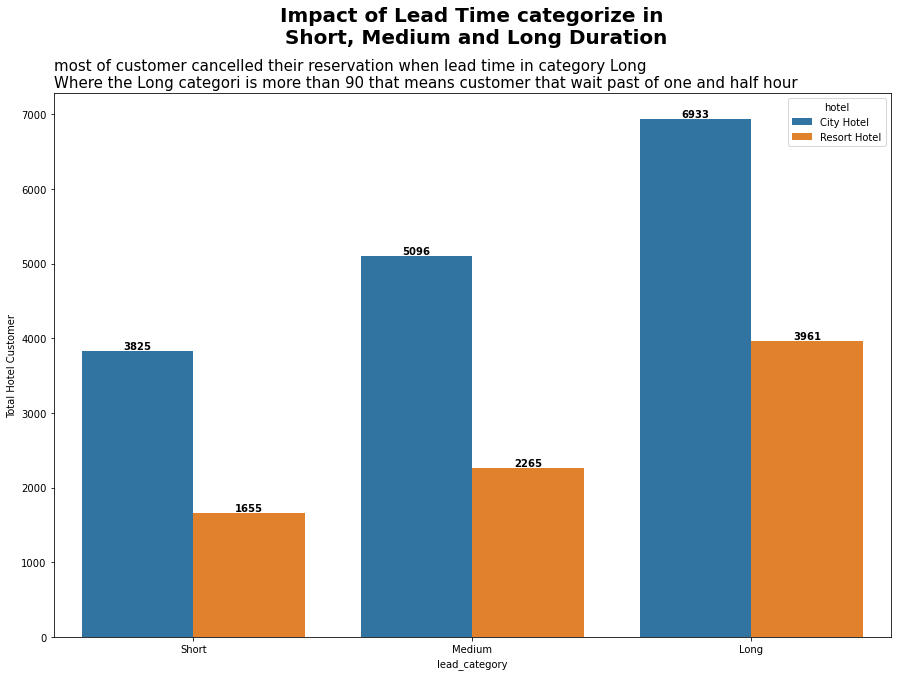

In [146]:
# dikategorikan sesuai dengan durasi (short, medium, Long)
df_corf2['lead_category']=np.where(df_corf2['lead_time']<30,'Short', 
                           np.where((df_corf2['lead_time']>=30)&(df_corf2['lead_time']<=90),'Medium','Long'))

dfg3 = df_corf2.groupby(['hotel','lead_category']).agg({'is_canceled' : 'sum'}).reset_index()
list_order = ['Short','Medium','Long']
dfg3['lead_category'] = pd.Categorical(dfg3['lead_category'], categories = list_order)
dfg3f = dfg3.sort_values(by = 'lead_category')


fig,ax = plt.subplots(figsize=(15,10))
plt.title('Impact of Lead Time categorize in\n Short, Medium and Long Duration\n\n', fontsize=20, weight='bold')
plt.title('most of customer cancelled their reservation when lead time in category Long\n' 
          'Where the Long categori is more than 90 that means customer that wait past of one and half hour', 
          fontsize =15, loc='left')


sns.barplot(x = 'lead_category', y= 'is_canceled', data=dfg3f, hue='hotel');
plt.ylabel('Total Hotel Customer')

for label in ax.containers:
    ax.bar_label(label,fontweight='bold')

plt.show()

### Insight

Dapat dilihat pada plot diatas bahwa semakin lamanya lead time atau waktu menuggu maka akan semakin besar kemungkinan dalam customer membatalkan pemesananya, jadi dari data tersebut dapat disimpulkan bahwa pelayanan kustomer yang cepat akan mengurangi tinkat pembatalan reservasi dan ini berlaku untuk hotel City maupun Resort. 
Jadi hal yang perlu ditingkatkan untuk mengurangi presentasi pembatalan berdasarkan lead time yaitu bagaimana cepatnya hotel melayani customer dan fasilitas yang perlu ditambahkan agar membuat customer nyaman saat menunggu